## 신경망과 딥러닝
# keras.datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [34]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

### fashion_mnist

In [4]:
help(keras.datasets.fashion_mnist.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST. The class labels are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of grayscale image data with shape
          (num_samples, 28, 28).
    
        **y_train, y_test**: uint8 arrays of labels (integers in range 0-9)
          with shape (

In [114]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [115]:
X_train.max(), X_train.min()

(255, 0)

In [116]:
X_train.dtype

dtype('uint8')

Text(0.5, 1.0, '0')

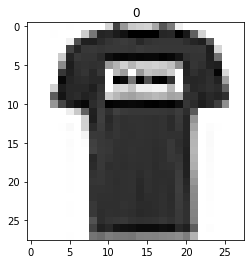

In [117]:
plt.imshow(X_train[1], cmap='gray_r')
plt.title(y_train[1])

In [118]:
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [119]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [120]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [122]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 14s 33ms/step - loss: 0.7569 - acc: 0.7346 - val_loss: 0.4276 - val_acc: 0.8462
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.3817 - acc: 0.8618 - val_loss: 0.3959 - val_acc: 0.8491
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.3388 - acc: 0.8770 - val_loss: 0.3427 - val_acc: 0.8786
Epoch 4/10
375/375 [==============================] - 11s 30ms/step - loss: 0.3167 - acc: 0.8843 - val_loss: 0.3714 - val_acc: 0.8672
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.2965 - acc: 0.8882 - val_loss: 0.3310 - val_acc: 0.8821
Epoch 6/10
375/375 [==============================] - 11s 31ms/step - loss: 0.2780 - acc: 0.8966 - val_loss: 0.3368 - val_acc: 0.8793
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.2619 - acc: 0.9002 - val_loss: 0.3298 - val_acc: 0.8836
Epoch 8/10
375/375 [==============================] - 12s 31ms

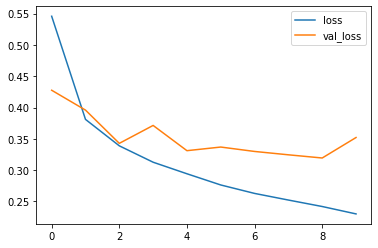

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

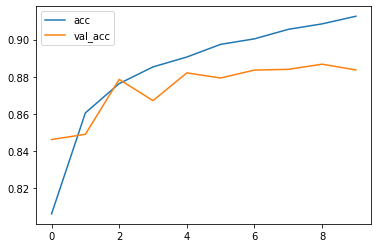

In [124]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [125]:
ws = model.get_weights()

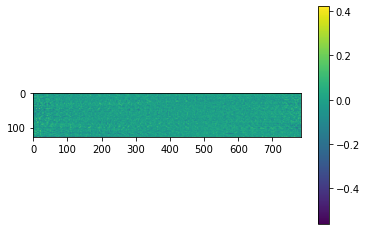

In [126]:
plt.imshow(ws[0].T)
plt.colorbar()

### cifar10

In [35]:
help(keras.datasets.cifar10.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.cifar10:

load_data()
    Loads [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of RGB image data with shape
          `(num_samples, 3, 32, 32)` if `tf.keras.backend.image_data_format()` is
          `'channels_first'`, or `(num_samples, 32, 32, 3)` if the data format
          is `'channels_last'`.
    
        **y_train, y_test**: uint8 arrays of category labels
          (integers in range 0-9) each with shape (num_samples, 1).



In [36]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [37]:
X_train.max(), X_train.min()

(255, 0)

In [38]:
X_train.dtype

dtype('uint8')

d:\anaconda3_5.3.0\envs\py38\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

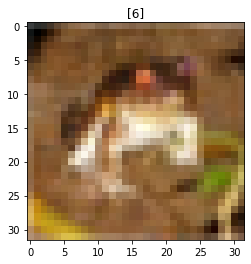

In [39]:
plt.imshow(X_train[0])
plt.title(y_train[0])

In [40]:
X_train = X_train.reshape(-1, 32*32*3)/255
X_test = X_test.reshape(-1, 32*32*3)/255

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [41]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(32*32*3,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 494,730
Trainable params: 494,730
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [45]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 28s 77ms/step - loss: 1.9997 - acc: 0.2644 - val_loss: 1.7533 - val_acc: 0.36411
Epoch 2/10
313/313 [==============================] - 22s 71ms/step - loss: 1.7036 - acc: 0.3876 - val_loss: 1.6764 - val_acc: 0.4007
Epoch 3/10
313/313 [==============================] - 22s 71ms/step - loss: 1.5975 - acc: 0.4280 - val_loss: 1.6137 - val_acc: 0.4309loss: 1.5984 - acc - ETA: 1s - loss: 1.5981 - acc: 0 - ETA: 0s - loss: 1.5979 - acc: 0.4 - ETA: 0s - loss: 1.5978 - a
Epoch 4/10
313/313 [==============================] - 23s 73ms/step - loss: 1.5332 - acc: 0.4540 - val_loss: 1.6110 - val_acc: 0.4302
Epoch 5/10
313/313 [==============================] - 23s 73ms/step - loss: 1.4787 - acc: 0.4672 - val_loss: 1.5464 - val_acc: 0.4524 0.46 - ETA: 7s - loss: 1.4758 - acc - ETA: 7s - lo - ETA: 0s - loss: 1.4786 - acc: 
Epoch 6/10
313/313 [==============================] - 23s 74ms/step - loss: 1.4627 - acc: 0.4784 - val_loss: 1.5167 - val_acc: 0

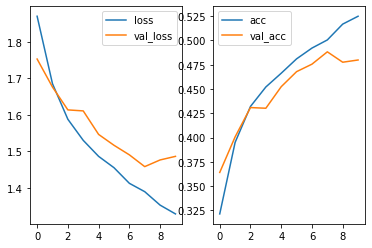

In [46]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### cifar10 흑백으로 변환

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [48]:
X_train.max(), X_train.min(), X_train.dtype

(255, 0, dtype('uint8'))

In [51]:
X_train = X_train.mean(axis=-1)/255
X_test = X_test.mean(axis=-1)/255

X_train.shape, X_test.shape

((50000, 32, 32), (10000, 32, 32))

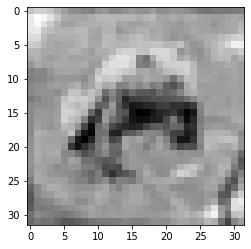

In [52]:
plt.imshow(X_train[0], cmap='gray_r')

In [53]:
X_train = X_train.reshape(-1,32*32)
X_test = X_test.reshape(-1,32*32)

X_train.shape, X_test.shape

((50000, 1024), (10000, 1024))

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(32*32,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 232,586
Trainable params: 232,586
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [60]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 18s 48ms/step - loss: 2.1100 - acc: 0.2224 - val_loss: 1.9225 - val_acc: 0.32045s - loss: 2.163
Epoch 2/30
313/313 [==============================] - 12s 40ms/step - loss: 1.8929 - acc: 0.3184 - val_loss: 1.8403 - val_acc: 0.3359
Epoch 3/30
313/313 [==============================] - 13s 42ms/step - loss: 1.7952 - acc: 0.3606 - val_loss: 1.8000 - val_acc: 0.3618
Epoch 4/30
313/313 [==============================] - 12s 39ms/step - loss: 1.7366 - acc: 0.3787 - val_loss: 1.7518 - val_acc: 0.3765
Epoch 5/30
313/313 [==============================] - 10s 33ms/step - loss: 1.7064 - acc: 0.3913 - val_loss: 1.8151 - val_acc: 0.3478
Epoch 6/30
313/313 [==============================] - 10s 33ms/step - loss: 1.6670 - acc: 0.4068 - val_loss: 1.7210 - val_acc: 0.3900
Epoch 7/30
313/313 [==============================] - 11s 34ms/step - loss: 1.6486 - acc: 0.4134 - val_loss: 1.7104 - val_acc: 0.3935
Epoch 8/30
313/313 [==========================

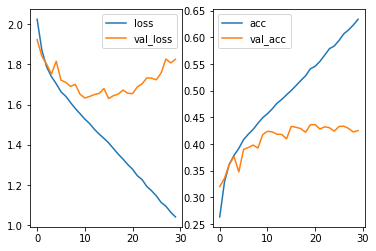

In [61]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [62]:
ws = model.get_weights()

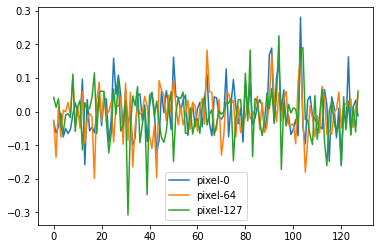

In [68]:
plt.plot(ws[0][0])
plt.plot(ws[0][64])
plt.plot(ws[0][-1])
plt.legend(['pixel-0', 'pixel-64', 'pixel-127'])

### keras 이미지 유틸

In [69]:
dir(keras.preprocessing.image)

['DirectoryIterator',
 'ImageDataGenerator',
 'Iterator',
 'NumpyArrayIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'apply_affine_transform',
 'apply_brightness_shift',
 'apply_channel_shift',
 'array_to_img',
 'img_to_array',
 'load_img',
 'random_brightness',
 'random_channel_shift',
 'random_rotation',
 'random_shear',
 'random_shift',
 'random_zoom',
 'save_img',
 'smart_resize']

In [71]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img, smart_resize

In [78]:
img = load_img(r'cats_and_dogs_small\train\dogs\dog.2.jpg')

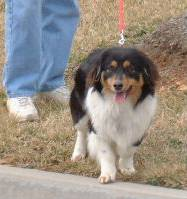

In [79]:
display(img)

In [82]:
dog = img_to_array(img)/255
print(dog.shape, dog.dtype, dog.max(), dog.min())

(199, 187, 3) float32 1.0 0.0


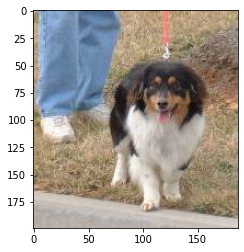

In [83]:
plt.imshow(dog)

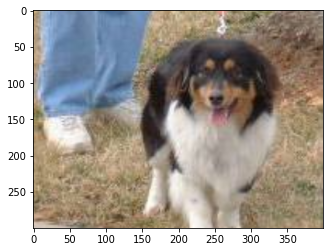

In [89]:
dog2 = smart_resize(dog, (300,400))
plt.imshow(dog2)

### 이미지 제너레이터

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [138]:
train_datagen = ImageDataGenerator(rescale=1/255.)

In [139]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [109]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 100, 100, 3) (20,)
[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]


In [110]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((100, 100, 3), dtype('float32'), 1.0, 0.03137255)

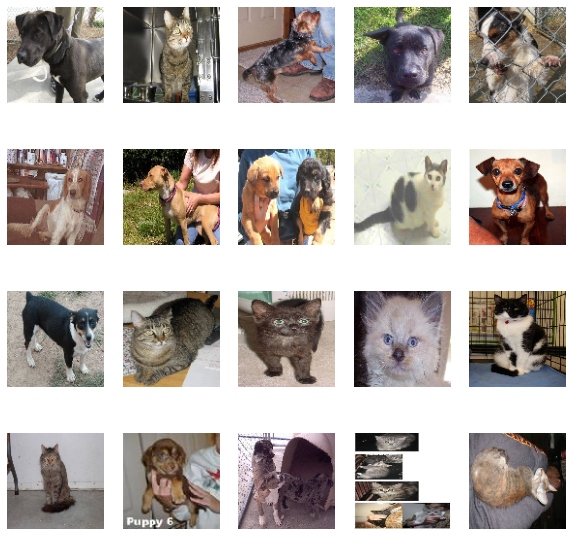

In [113]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [140]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [141]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [151]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(100,100,3)))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(2000, activation='relu'))
model.add(keras.layers.Dense(2000, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 1000)              30001000  
_________________________________________________________________
dense_46 (Dense)             (None, 2000)              2002000   
_________________________________________________________________
dense_47 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2001      
Total params: 36,007,001
Trainable params: 36,007,001
Non-trainable params: 0
_________________________________________________________________


In [152]:
from tensorflow.keras.optimizers import Adam

In [153]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001),
              metrics=['acc'])

In [154]:
history = model.fit_generator(train_generator, epochs=5, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 91s 882ms/step - loss: 0.8247 - acc: 0.5197 - val_loss: 0.6903 - val_acc: 0.5330
Epoch 2/5
100/100 [==============================] - 87s 869ms/step - loss: 0.7170 - acc: 0.5205 - val_loss: 0.6813 - val_acc: 0.5560
Epoch 3/5
100/100 [==============================] - 88s 881ms/step - loss: 0.6910 - acc: 0.5509 - val_loss: 0.6674 - val_acc: 0.5970
Epoch 4/5
100/100 [==============================] - 87s 873ms/step - loss: 0.6708 - acc: 0.5795 - val_loss: 0.6801 - val_acc: 0.5780
Epoch 5/5
100/100 [==============================] - 86s 864ms/step - loss: 0.6578 - acc: 0.6011 - val_loss: 0.6972 - val_acc: 0.5630
